In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
adata = sc.read(f'BRCA2_Xenium.h5ad', library_id='P1')
adata

AnnData object with n_obs × n_vars = 118691 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
    layers: 'Raw'

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


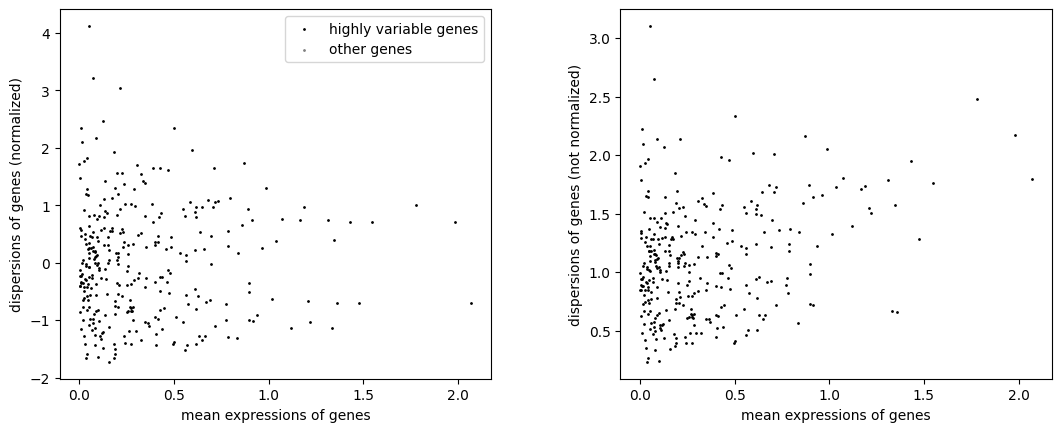

In [3]:
adata1 = adata.copy()
adata1.layers["counts"] = adata1.X.copy()
sc.pp.normalize_total(adata1)
sc.pp.log1p(adata1)
sc.pp.highly_variable_genes(adata1, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=649)
sc.pl.highly_variable_genes(adata1, show=False)
adata1 = adata1[:, adata1.var['highly_variable']]
sc.pp.scale(adata1, max_value=10)
sc.tl.pca(adata1, svd_solver='arpack',n_comps=128)

In [4]:
adata1

AnnData object with n_obs × n_vars = 118691 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    layers: 'Raw', 'counts'

In [5]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
import scanpy as sc
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def permutation(feature):
    ids = np.arange(feature.shape[0])
    ids = np.random.permutation(ids)
    feature_permutated = feature[ids]
    return feature_permutated 

adata1.obsm['feat'] = adata1.obsm['X_pca']
adata1.obsm['feat_a'] = permutation(adata1.obsm['feat'])

In [ ]:
model = GARDEN.GARDEN_Batch(adata1,k_dynamic=8,device=device,k_cl=8,dim_output=32,model_select = 'KNN',epochs = 800, datatype='HD')
# train model
adata1 = model.train_expand(batch_number=10)

Graph_2 Construction
The graph contains 949528 edges, 118691 cells.
8.0000 neighbors per cell on average.
No adj in high throughout
Batch : 0 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 1 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 2 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 3 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 4 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 5 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 6 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 7 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 8 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83090 edges, 11870 cells.
7.0000 neighbors per cell on average.
Over!
Batch : 9 Preprocessing


/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 83027 edges, 11861 cells.
7.0000 neighbors per cell on average.
Over!
Begin to train ST data...


  0%|          | 1/800 [00:01<16:32,  1.24s/it]

Epoch 0, Overall Loss: 120571.6182


 13%|█▎        | 101/800 [00:28<03:10,  3.68it/s]

Epoch 100, Overall Loss: 230.4722


 25%|██▌       | 201/800 [00:55<02:44,  3.65it/s]

Epoch 200, Overall Loss: 146.1079


 38%|███▊      | 301/800 [01:23<02:17,  3.64it/s]

Epoch 300, Overall Loss: 136.6382


 50%|█████     | 401/800 [01:50<01:49,  3.64it/s]

Epoch 400, Overall Loss: 135.3117


 63%|██████▎   | 501/800 [02:18<01:22,  3.63it/s]

Epoch 500, Overall Loss: 143.7699


 75%|███████▌  | 601/800 [02:45<00:54,  3.63it/s]

Epoch 600, Overall Loss: 145.7539


 88%|████████▊ | 701/800 [03:13<00:27,  3.63it/s]

Epoch 700, Overall Loss: 130.9418


100%|██████████| 800/800 [03:40<00:00,  3.63it/s]


Optimization finished for ST data!


In [9]:
n_clusters = 17
radius = 0
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GARDEN.utils import clustering

if tool == 'mclust':
   clustering(adata1, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata1, n_clusters, radius=radius, method=tool, start=0.1, end=0.6, increment=0.01, refinement=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


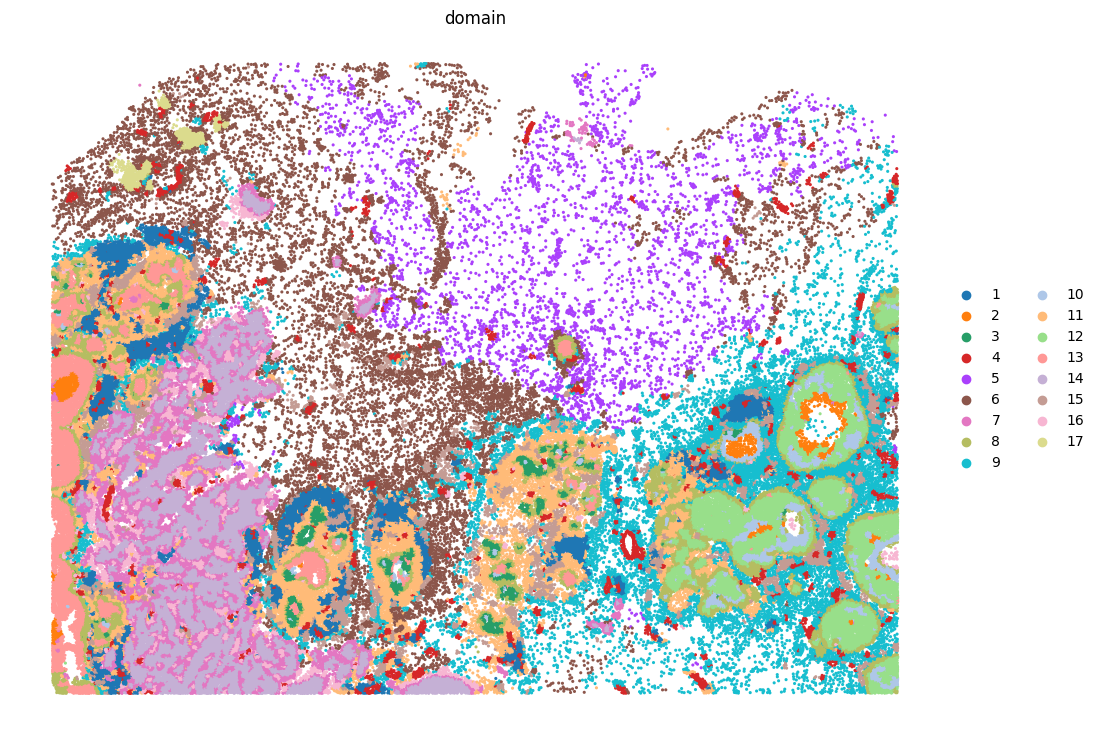

In [10]:
plt.rcParams["figure.figsize"] = (12, 9)

sc.pl.embedding(adata1,basis='spatial',color = 'domain',frameon = False,colorbar_loc=None,size = 20)